# Exercises set 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Exercise 1

a. Verify that the Hadamard gate $H$ is unitary.

b. Verify that $H^2 = I$.

c. What are the eigenvalues and eigenvectors of $H$?

([<a href="#ref1">Nielsen10</a>] Exercises 2.51, 2.52 and 2.53 pp 82)

In first place, we must clarify that Hadarmard gate is defined as:

$$
H = \dfrac{1}{\sqrt{2}}
\left(
\begin{matrix}
    1 & 1 \\
    1 & -1
\end{matrix}
\right)
$$

In order to show that $H$ is unitary, we must proof that $H H^{\dagger} = I$. In order to compute te adjointm we get the values conjugate and we transpose it. As all the values in $H$ are real, it is enough by just transposing the matrix.

$$
\begin{align*}
    H H^{\dagger} &= H H^T \\
                  &=
\dfrac{1}{2}
\left(
\begin{matrix}
    1 & 1 \\
    1 & -1
\end{matrix}
\right)
\left(
\begin{matrix}
    1 & 1 \\
    1 & -1
\end{matrix}
\right)^{T} \\
                  &=
\dfrac{1}{2}
\left(
\begin{matrix}
    1 & 1 \\
    1 & -1
\end{matrix}
\right)
\left(
\begin{matrix}
    1 & 1 \\
    1 & -1
\end{matrix}
\right) = H H = H^2\\
                  &=
\dfrac{1}{2}
\left(
\begin{matrix}
    2 & 0 \\
    0 & 2
\end{matrix}
\right) \\
                  &=
\left(
\begin{matrix}
    1 & 0 \\
    0 & 1
\end{matrix}
\right) = I
\end{align*}
$$

As we could proof that $H H^{\dagger} = I$ we can conclude that:

$$\therefore H \text{ is unitary}$$

Also, in the middle of the proof we could see a middle result of interest related to $H^2$. It lets us conclude too that:

$$\therefore H^2 = I$$

Now we will find the eigenvalues andd eigenvectors of this matrix:

$$
\begin{align*}
    |H - \lambda I| &= 0 \\[6pt]
    \left|
    \begin{matrix}
        \tfrac{1}{\sqrt{2}} - \lambda & \tfrac{1}{\sqrt{2}} \\
        \tfrac{1}{\sqrt{2}} & -\tfrac{1}{\sqrt{2}} - \lambda
    \end{matrix}
    \right| &= 0 \\[8pt]
    \left(\tfrac{1}{\sqrt{2}} - \lambda\right)\left(-\tfrac{1}{\sqrt{2}} - \lambda\right)
    - \tfrac{1}{2} &= 0 \\[8pt]
    \left(-\tfrac{1}{2} + \lambda^2\right) - \tfrac{1}{2} &= 0 \\[6pt]
    \lambda^2 - 1 &= 0 \\[6pt]
    \lambda &= \pm 1
\end{align*}
$$

Now knowing that eigenvalues are $1$ and $-1$, we will try to get the eigenvectors.

1. For $\lambda = 1$

$$
\begin{align*}
\left(
\begin{matrix}
\frac{1}{\sqrt{2}} - 1 & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} - 1
\end{matrix}
\right)
\begin{pmatrix}x \\ y\end{pmatrix} &= 
\begin{pmatrix}
(\frac{1}{\sqrt{2}} - 1)x + \frac{1}{\sqrt{2}} y \\
\frac{1}{\sqrt{2}} x + (-\frac{1}{\sqrt{2}} - 1)y
\end{pmatrix} = 0 \\[4pt]
(\frac{1}{\sqrt{2}} - 1)x + \frac{1}{\sqrt{2}} y &= 0 \\[2pt]
\frac{1}{\sqrt{2}} y &= (1 - \frac{1}{\sqrt{2}}) x \\[2pt]
y &= (\sqrt{2} - 1)x \\[2pt]
\vec{v}_+ &\propto 
\begin{pmatrix}x \\ y\end{pmatrix} =
\begin{pmatrix}1 \\ \sqrt{2}-1\end{pmatrix} \\[2pt]
\text{normalized: } 
\vec{v}_+ &= 
\frac{1}{\sqrt{1 + (\sqrt{2}-1)^2}}
\begin{pmatrix}1 \\ \sqrt{2}-1\end{pmatrix}
\end{align*}
$$

1. For $\lambda = -1$

$$
\begin{align*}
\left(
\begin{matrix}
\frac{1}{\sqrt{2}} + 1 & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} + 1
\end{matrix}
\right)
\begin{pmatrix}x \\ y\end{pmatrix} &= 0 \\[4pt]
(\frac{1}{\sqrt{2}} + 1)x + \frac{1}{\sqrt{2}}y &= 0 \\[2pt]
\frac{1}{\sqrt{2}} y &= -(\frac{1}{\sqrt{2}} + 1)x \\[2pt]
y &= -(\sqrt{2} + 1)x \\[2pt]
\vec{v}_- &\propto 
\begin{pmatrix}x \\ y\end{pmatrix} =
\begin{pmatrix}-1 \\ \sqrt{2}+1\end{pmatrix} \\[2pt]
\text{normalized: } 
\vec{v}_- &= 
\frac{1}{\sqrt{1 + (\sqrt{2}+1)^2}}
\begin{pmatrix}-1 \\ \sqrt{2}+1\end{pmatrix}
\end{align*}
$$



In [ ]:
H = 1/np.sqrt(2) * np.array([[1, 1],
                             [1, -1]])

adj = lambda x: np.conjugate(x.T)
eigvals, eigvecs = np.linalg.eig(H)


expected_eig_vals = np.array([1, -1])
expected_eig_vecs = np.array([[1, -1],
                              [np.sqrt(2)-1, (np.sqrt(2)+1)]], dtype=float)
expected_eig_vecs = expected_eig_vecs / np.linalg.norm(expected_eig_vecs, axis=0)


assert np.allclose(adj(H) @ H, np.eye(2)), "H is not unitary"
assert np.allclose(H @ H, np.eye(2)), "H^2 is not identity"
assert np.allclose(np.sort(eigvals), np.sort(expected_eig_vals)), "Eigenvalues do not match"
assert np.allclose(eigvecs, expected_eig_vecs), "Eigenvectors do not match"

## Exercise 2

Calculate and draw the circle in the section 7 of the presentation about qubits for all the following unitary operators: $H, Y , Z, HZ$ and $ZH$.

In [3]:
ket_0 = np.array([1.0, 0.0])
ket_1 = np.array([0.0, 1.0])
ket_plus = (ket_0 + ket_1) / np.sqrt(2)
ket_minus = (ket_0 - ket_1) / np.sqrt(2)

base_kets = np.column_stack([ket_0, ket_1, ket_plus, ket_minus])
kets = np.hstack([base_kets, -base_kets])

base_labels = ['|0⟩', '|1⟩', '|+⟩', '|-⟩']
labels = base_labels + [f'-{s}' for s in base_labels]

def plot_ket_circle(operator: np.ndarray, title: str = "Circle Relations", radius: int = 1.0) -> None:
    ket_to_node = {}
    for i in range(kets.shape[1]):
        key = tuple(np.round(kets[:, i], 8))
        ket_to_node[key] = i

    G = nx.DiGraph()
    for i, lbl in enumerate(labels):
        G.add_node(i, label=lbl, vec=kets[:, i])

    tol = 1e-8
    for i in range(kets.shape[1]):
        start = kets[:, i]
        mapped = operator @ start
        found = False
        for j in range(kets.shape[1]):
            if np.allclose(mapped, kets[:, j], atol=tol):
                G.add_edge(i, j)
                found = True
                break
        if not found:
            print(f"Warning: mapped ket {mapped} not found among nodes.")

    pos = {i: (kets[0, i], kets[1, i]) for i in range(kets.shape[1])}
    ax = plt.gca()

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=600, edgecolors='black')
    nx.draw_networkx_labels(G, pos, labels={i: G.nodes[i]['label'] for i in G.nodes()}, font_size=10)

    for u, v in G.edges():
        if u == v:
            nx.draw_networkx_edges(G, pos,
                                   edgelist=[(u, v)],
                                   connectionstyle=f"arc3,rad={radius}",
                                   arrows=True,
                                   arrowsize=20,
                                   edge_color='red')
        else:
            # straight line
            nx.draw_networkx_edges(G, pos,
                                   edgelist=[(u, v)],
                                   connectionstyle="arc3,rad=0.0",
                                   arrows=True,
                                   arrowsize=20,
                                   edge_color='red')

    circle = plt.Circle((0,0), 1, fill=False, color='blue', linestyle='--')
    ax.add_artist(circle)

    plt.axis('equal')
    plt.axis('off')
    plt.title(f'{title} Unitary Operator')

In [4]:
H = 1/np.sqrt(2) * np.array([[1, 1],
                             [1, -1]])
Z = np.array([[1, 0],
              [0, -1]])
Y = np.array([[0, -1j],
              [1j, 0]])
HZ = H @ Z
ZH = Z @ H

real_operators = [H, Z, HZ, ZH]
real_operators_names = ['H', 'Z', 'HZ', 'ZH']

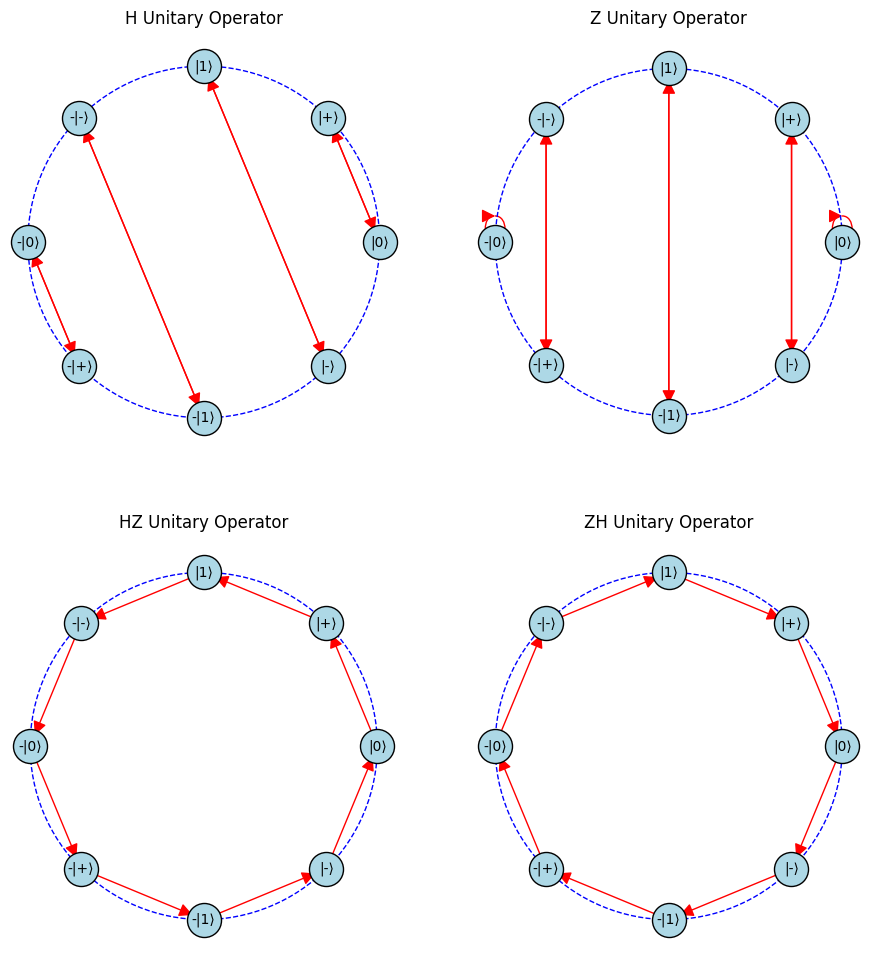

In [5]:
plt.figure(figsize=(11, 12))
for i, operator in enumerate(real_operators):
    plt.subplot(2,2, i + 1)
    plot_ket_circle(operator, real_operators_names[i])
plt.show()

## References
[Nielsen10] <a id="ref1"></a>  Michael A. Nielsen & Isaac L. Chuang. Quantum Computation and Quantum Information. CAMBRIDGE UNIVERSITY PRESS. 2010